## 🏡 Apartment Type Prediction 

Given *data about home rentals in Germany*, let's try to predict if a given home is **an apartment** or not. 

We will use a Tensorflow/Keras neural network to make our predictions. 

Data source: https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2025-02-10 12:10:41.541226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("immo_data.csv")
data

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0       ONE_YEAR_FREE                       NaN       False    False   
1       ONE_YEAR_FREE                       NaN       False     True   
2       ONE_YEAR_FREE                      10.0        True     True   
3       ONE_YEAR_FREE                       NaN       False     True   
4                 NaN                       NaN       False     True   
...               ...                       ...         ...      ...   
268845  ONE_YEAR_FREE                       NaN       False     True   
268846            NaN                       NaN       False     True   
268847  ONE_YEAR_FREE                       NaN       False     True   
268848            NaN                       NaN        True     True   
268849            NaN                       NaN       False     True   

        picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0                  6        4.62                10.0      840.0   
1                  8        3.47                10.0        NaN   
2                  8        2.72                 2.4     1300.0   
3                  9        1.53                40.0        NaN   
4                 19        2.46                 NaN      903.0   
...              ...         ...                 ...        ...   
268845             0        2.74                10.0      910.0   
268846            12        6.49                 NaN     1150.0   
268847            21        2.90                40.0      930.0   
268848            16        4.39                 NaN     1015.0   
268849             9        5.00                 NaN        NaN   

        yearConstructed    scoutId  noParkSpaces       firingTypes  \
0                1965.0   96107057           1.0               oil   
1                1871.0  111378734           2.0               gas   
2                2019.0  113147523           1.0               NaN   
3                1964.0  108890903           NaN  district_heating   
4                1950.0  114751222           NaN               gas   
...                 ...        ...           ...               ...   
268845           2016.0  115641081           1.0        geothermal   
268846           1983.0   96981497           1.0               gas   
268847           1965.0   66924271           1.0               gas   
268848           2019.0  110938302           1.0               gas   
268849           1972.0  115524054           1.0  district_heating   

        hasKitchen              geo_bln  cellar  yearConstructedRange  \
0            False  Nordrhein_Westfalen    True                   2.0   
1            False      Rheinland_Pfalz   False                   1.0   
2            False              Sachsen    True                   9.0   
3            False              Sachsen   False                   2.0   
4            False               Bremen   False                   1.0   
...            ...                  ...     ...                   ...   
268845       False               Bayern    True               

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

### Preprocessing

In [4]:
df = data.copy()

In [5]:
pd.get_dummies(df['regio3']) # High cardinality

Aach  Aachen_Eilendorf  Aalen  Aarbergen  Aaseestadt  Abenberg  \
0       False             False  False      False       False     False   
1       False             False  False      False       False     False   
2       False             False  False      False       False     False   
3       False             False  False      False       False     False   
4       False             False  False      False       False     False   
...       ...               ...    ...        ...         ...       ...   
268845  False             False  False      False       False     False   
268846  False             False  False      False       False     False   
268847  False             False  False      False       False     False   
268848  False             False  False      False       False     False   
268849  False             False  False      False       False     False   

        Abenheim  Abensberg  Abstatt  Abtsgmünd  Abtsteinach  Achdorf  Achern  \
0          False      False    False      False        False    False   False   
1          False      False    False      False        False    False   False   
2          False      False    False      False        False    False   False   
3          False      False    False      False        False    False   False   
4          False      False    False      False        False    False   False   
...          ...        ...      ...        ...          ...      ...     ...   
268845     False      False    False      False        False    False   False   
268846     False      False    False      False        False    False   False   
268847     False      False    False      False        False    False   False   
268848     False      False    False      False        False    False   False   
268849     False      False    False      False        False    False   False   

        Achim  Achstetten  Achtrup  Adalbertsteinweg  Adelebsen  \
0       False       False    False             False      False   
1       False       False    False             False      False   
2       False       False    False             False      False   
3       False       False    False             False      False   
4       False       False    False             False      False   
...       ...         ...      ...               ...        ...   
268845  False       False    False             False      False   
268846  False       False    False             False      False   
268847  False       False    False             False      False   
268848  False       False    False             False      False   
268849  False       False    False             False      False   

        Adelheidsdorf  Adelmannsfelden  Adelsberg  Adelschlag  Adelsdorf  \
0               False            False      False       False      False   
1               False            False      False       False      False   
2               False            False      False       False      False   
3               False            False      False       False      False   
4               False            False      False       False      False   
...               ...              ...        ...         ...        ...   
268845          False            False      False       False      False   
268846          False            False      False       False      False   
268847          False            False      False       False      False   
268848          False            False      False       False      False   
268849          False            False      False       False      False   

        Adelsheim  Adelshofen  Adelsried  Adenau  Adenbach  Adenbüttel  \
0           False       False      False   False     False       False   
1           False       False      False   False     False       False   
2           False       False      False   False     False       False   
3           False       False      False   False     False       False   
4           False       False      False   Fals

In [6]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'regio1': 16,
 'heatingType': 14,
 'telekomTvOffer': 4,
 'firingTypes': 133,
 'geo_bln': 16,
 'houseNumber': 5511,
 'geo_krs': 419,
 'condition': 11,
 'interiorQual': 5,
 'petsAllowed': 4,
 'street': 52373,
 'streetPlain': 54491,
 'typeOfFlat': 11,
 'regio2': 419,
 'regio3': 8684,
 'description': 212622,
 'facilities': 189527,
 'energyEfficiencyClass': 11,
 'date': 4}

In [7]:
# Drop High Cardinality categorical columns
df = df.drop(["houseNumber", "streetPlain", "regio3", "street", "description", "facilities"], axis=1)
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  \
0       ONE_YEAR_FREE                       NaN       False    False   
1       ONE_YEAR_FREE                       NaN       False     True   
2       ONE_YEAR_FREE                      10.0        True     True   
3       ONE_YEAR_FREE                       NaN       False     True   
4                 NaN                       NaN       False     True   
...               ...                       ...         ...      ...   
268845  ONE_YEAR_FREE                       NaN       False     True   
268846            NaN                       NaN       False     True   
268847  ONE_YEAR_FREE                       NaN       False     True   
268848            NaN                       NaN        True     True   
268849            NaN                       NaN       False     True   

        picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0                  6        4.62                10.0      840.0   
1                  8        3.47                10.0        NaN   
2                  8        2.72                 2.4     1300.0   
3                  9        1.53                40.0        NaN   
4                 19        2.46                 NaN      903.0   
...              ...         ...                 ...        ...   
268845             0        2.74                10.0      910.0   
268846            12        6.49                 NaN     1150.0   
268847            21        2.90                40.0      930.0   
268848            16        4.39                 NaN     1015.0   
268849             9        5.00                 NaN        NaN   

        yearConstructed    scoutId  noParkSpaces       firingTypes  \
0                1965.0   96107057           1.0               oil   
1                1871.0  111378734           2.0               gas   
2                2019.0  113147523           1.0               NaN   
3                1964.0  108890903           NaN  district_heating   
4                1950.0  114751222           NaN               gas   
...                 ...        ...           ...               ...   
268845           2016.0  115641081           1.0        geothermal   
268846           1983.0   96981497           1.0               gas   
268847           1965.0   66924271           1.0               gas   
268848           2019.0  110938302           1.0               gas   
268849           1972.0  115524054           1.0  district_heating   

        hasKitchen              geo_bln  cellar  yearConstructedRange  \
0            False  Nordrhein_Westfalen    True                   2.0   
1            False      Rheinland_Pfalz   False                   1.0   
2            False              Sachsen    True                   9.0   
3            False              Sachsen   False                   2.0   
4            False               Bremen   False                   1.0   
...            ...                  ...     ...                   ...   
268845       False               Bayern    True               

In [8]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'regio1': 16,
 'heatingType': 14,
 'telekomTvOffer': 4,
 'firingTypes': 133,
 'geo_bln': 16,
 'geo_krs': 419,
 'condition': 11,
 'interiorQual': 5,
 'petsAllowed': 4,
 'typeOfFlat': 11,
 'regio2': 419,
 'energyEfficiencyClass': 11,
 'date': 4}

In [9]:
# Drop columns with more than 25% missing values
missing_value_columns = df.loc[:, df.isna().mean() > 0.25].columns
df = df.drop(missing_value_columns, axis=1)
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4                 NaN       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
268845  ONE_YEAR_FREE       False     True             0        2.74   
268846            NaN       False     True            12        6.49   
268847  ONE_YEAR_FREE       False     True            21        2.90   
268848            NaN        True     True            16        4.39   
268849            NaN       False     True             9        5.00   

        telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0                     10.0      840.0           1965.0   96107057   
1                     10.0        NaN           1871.0  111378734   
2                      2.4     1300.0           2019.0  113147523   
3                     40.0        NaN           1964.0  108890903   
4                      NaN      903.0           1950.0  114751222   
...                    ...        ...              ...        ...   
268845                10.0      910.0           2016.0  115641081   
268846                 NaN     1150.0           1983.0   96981497   
268847                40.0      930.0           1965.0   66924271   
268848                 NaN     1015.0           2019.0  110938302   
268849                 NaN        NaN           1972.0  115524054   

             firingTypes  hasKitchen              geo_bln  cellar  \
0                    oil       False  Nordrhein_Westfalen    True   
1                    gas       False      Rheinland_Pfalz   False   
2                    NaN       False              Sachsen    True   
3       district_heating       False              Sachsen   False   
4                    gas       False               Bremen   False   
...                  ...         ...                  ...     ...   
268845        geothermal       False               Bayern    True   
268846               gas        True               Hessen   False   
268847               gas       False               Hessen    True   
268848               gas       False  Nordrhein_Westfalen    True   
268849  district_heating        True               Hessen    True   

        yearConstructedRange  baseRent  livingSpace                  geo_krs  \
0                        2.0     595.0        86.00                 Dortmund   
1                        1.0     800.0        89.00        Rhein_Pfalz_Kreis   
2                        9.0     965.0        83.80                  Dresden   
3                        2.0     343.0        58.15      Mittelsachsen_Kreis   
4                        1.0     765.0        84.97                   Bremen   
...                      ...       ...          ...                      ...   
2

In [10]:
df.isna().mean()*100

regio1                   0.000000
serviceCharge            2.569834
heatingType             16.684397
telekomTvOffer          12.132788
newlyConst               0.000000
balcony                  0.000000
picturecount             0.000000
pricetrend               0.681421
telekomUploadSpeed      12.407662
totalRent               15.070485
yearConstructed         21.218151
scoutId                  0.000000
firingTypes             21.188023
hasKitchen               0.000000
geo_bln                  0.000000
cellar                   0.000000
yearConstructedRange    21.218151
baseRent                 0.000000
livingSpace              0.000000
geo_krs                  0.000000
lift                     0.000000
baseRentRange            0.000000
typeOfFlat              13.618747
geo_plz                  0.000000
noRooms                  0.000000
floor                   19.084620
noRoomsRange             0.000000
garden                   0.000000
livingSpaceRange         0.000000
regio2        

In [11]:
df['typeOfFlat'].value_counts().drop('apartment').sum(), df['typeOfFlat'].value_counts()[0]

/tmp/ipykernel_1693/771036993.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['typeOfFlat'].value_counts().drop('apartment').sum(), df['typeOfFlat'].value_counts()[0]


(100714, 131522)

In [12]:
# Construct Label column
# Drop examples with missing label values
missing_label_rows = df.loc[df['typeOfFlat'].isna(), :].index
df = df.drop(missing_label_rows, axis=0).reset_index(drop=True)

In [13]:
df['isApartment'] = df['typeOfFlat'].apply(lambda x: 1 if x == 'apartment' else 0)
df = df.drop('typeOfFlat', axis=1)
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
232231               Bayern          90.00                       heat_pump   
232232               Hessen         220.00                     gas_heating   
232233               Hessen         220.00                 central_heating   
232234  Nordrhein_Westfalen         175.00                       heat_pump   
232235               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4                 NaN       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
232231  ONE_YEAR_FREE       False     True             0        2.74   
232232            NaN       False     True            12        6.49   
232233  ONE_YEAR_FREE       False     True            21        2.90   
232234            NaN        True     True            16        4.39   
232235            NaN       False     True             9        5.00   

        telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0                     10.0      840.0           1965.0   96107057   
1                     10.0        NaN           1871.0  111378734   
2                      2.4     1300.0           2019.0  113147523   
3                     40.0        NaN           1964.0  108890903   
4                      NaN      903.0           1950.0  114751222   
...                    ...        ...              ...        ...   
232231                10.0      910.0           2016.0  115641081   
232232                 NaN     1150.0           1983.0   96981497   
232233                40.0      930.0           1965.0   66924271   
232234                 NaN     1015.0           2019.0  110938302   
232235                 NaN        NaN           1972.0  115524054   

             firingTypes  hasKitchen              geo_bln  cellar  \
0                    oil       False  Nordrhein_Westfalen    True   
1                    gas       False      Rheinland_Pfalz   False   
2                    NaN       False              Sachsen    True   
3       district_heating       False              Sachsen   False   
4                    gas       False               Bremen   False   
...                  ...         ...                  ...     ...   
232231        geothermal       False               Bayern    True   
232232               gas        True               Hessen   False   
232233               gas       False               Hessen    True   
232234               gas       False  Nordrhein_Westfalen    True   
232235  district_heating        True               Hessen    True   

        yearConstructedRange  baseRent  livingSpace                  geo_krs  \
0                        2.0     595.0        86.00                 Dortmund   
1                        1.0     800.0        89.00        Rhein_Pfalz_Kreis   
2                        9.0     965.0        83.80                  Dresden   
3                        2.0     343.0        58.15      Mittelsachsen_Kreis   
4                        1.0     765.0        84.97                   Bremen   
...                      ...       ...          ...                      ...   
2

In [14]:
df.isna().sum()

regio1                      0
serviceCharge            5723
heatingType             33486
telekomTvOffer          28131
newlyConst                  0
balcony                     0
picturecount                0
pricetrend               1657
telekomUploadSpeed      28785
totalRent               34459
yearConstructed         48426
scoutId                     0
firingTypes             46311
hasKitchen                  0
geo_bln                     0
cellar                      0
yearConstructedRange    48426
baseRent                    0
livingSpace                 0
geo_krs                     0
lift                        0
baseRentRange               0
geo_plz                     0
noRooms                     0
floor                   43787
noRoomsRange                0
garden                      0
livingSpaceRange            0
regio2                      0
date                        0
isApartment                 0
dtype: int64

In [15]:
df.select_dtypes('object')

regio1                     heatingType telekomTvOffer  \
0       Nordrhein_Westfalen                 central_heating  ONE_YEAR_FREE   
1           Rheinland_Pfalz  self_contained_central_heating  ONE_YEAR_FREE   
2                   Sachsen                   floor_heating  ONE_YEAR_FREE   
3                   Sachsen                district_heating  ONE_YEAR_FREE   
4                    Bremen  self_contained_central_heating            NaN   
...                     ...                             ...            ...   
232231               Bayern                       heat_pump  ONE_YEAR_FREE   
232232               Hessen                     gas_heating            NaN   
232233               Hessen                 central_heating  ONE_YEAR_FREE   
232234  Nordrhein_Westfalen                       heat_pump            NaN   
232235               Hessen                 central_heating            NaN   

             firingTypes              geo_bln                  geo_krs  \
0                    oil  Nordrhein_Westfalen                 Dortmund   
1                    gas      Rheinland_Pfalz        Rhein_Pfalz_Kreis   
2                    NaN              Sachsen                  Dresden   
3       district_heating              Sachsen      Mittelsachsen_Kreis   
4                    gas               Bremen                   Bremen   
...                  ...                  ...                      ...   
232231        geothermal               Bayern  Weilheim_Schongau_Kreis   
232232               gas               Hessen         Bergstraße_Kreis   
232233               gas               Hessen   Limburg_Weilburg_Kreis   
232234               gas  Nordrhein_Westfalen                     Köln   
232235  district_heating               Hessen        Frankfurt_am_Main   

                         regio2   date  
0                      Dortmund  May19  
1             Rhein_Pfalz_Kreis  May19  
2                       Dresden  Oct19  
3           Mittelsachsen_Kreis  May19  
4                        Bremen  Feb20  
...                         ...    ...  
232231  Weilheim_Schongau_Kreis  Feb20  
232232         Bergstraße_Kreis  May19  
232233   Limburg_Weilburg_Kreis  Feb20  
232234                     Köln  May19  
232235        Frankfurt_am_Main  Feb20  

[232236 rows x 8 columns]

In [16]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'regio1': 16,
 'heatingType': 14,
 'telekomTvOffer': 4,
 'firingTypes': 124,
 'geo_bln': 16,
 'geo_krs': 419,
 'regio2': 419,
 'date': 4}

In [17]:
# One Hot Encoding for nominal features
def onehot_encode(df, col):
    df = df.copy()
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
    return df

In [18]:
# Separating numerical and categorical columns for processing missing values
remaining_na_columns = df.loc[:, df.isna().sum() > 0]
categorical_na_columns = remaining_na_columns.select_dtypes('object').columns
numeric_na_columns = remaining_na_columns.drop(categorical_na_columns, axis=1).columns

# Fill numeric missing values with column mean
for column in numeric_na_columns:
    df[column] = df[column].fillna(df[column].mean())

# Fill categorical missing values with 'missing'
for column in categorical_na_columns:
    df[column] = df[column].fillna('missing')

In [19]:
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
232231               Bayern          90.00                       heat_pump   
232232               Hessen         220.00                     gas_heating   
232233               Hessen         220.00                 central_heating   
232234  Nordrhein_Westfalen         175.00                       heat_pump   
232235               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4             missing       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
232231  ONE_YEAR_FREE       False     True             0        2.74   
232232        missing       False     True            12        6.49   
232233  ONE_YEAR_FREE       False     True            21        2.90   
232234        missing        True     True            16        4.39   
232235        missing       False     True             9        5.00   

        telekomUploadSpeed    totalRent  yearConstructed    scoutId  \
0                10.000000   840.000000           1965.0   96107057   
1                10.000000   930.256478           1871.0  111378734   
2                 2.400000  1300.000000           2019.0  113147523   
3                40.000000   930.256478           1964.0  108890903   
4                28.899496   903.000000           1950.0  114751222   
...                    ...          ...              ...        ...   
232231           10.000000   910.000000           2016.0  115641081   
232232           28.899496  1150.000000           1983.0   96981497   
232233           40.000000   930.000000           1965.0   66924271   
232234           28.899496  1015.000000           2019.0  110938302   
232235           28.899496   930.256478           1972.0  115524054   

             firingTypes  hasKitchen              geo_bln  cellar  \
0                    oil       False  Nordrhein_Westfalen    True   
1                    gas       False      Rheinland_Pfalz   False   
2                missing       False              Sachsen    True   
3       district_heating       False              Sachsen   False   
4                    gas       False               Bremen   False   
...                  ...         ...                  ...     ...   
232231        geothermal       False               Bayern    True   
232232               gas        True               Hessen   False   
232233               gas       False               Hessen    True   
232234               gas       False  Nordrhein_Westfalen    True   
232235  district_heating        True               Hessen    True   

        yearConstructedRange  baseRent  livingSpace                  geo_krs  \
0                        2.0     595.0        86.00                 Dortmund   
1                        1.0     800.0        89.00        Rhein_Pfalz_Kreis   
2                        9.0     965.0        83.80                  Dresden   
3                        2.0     343.0        58.15      Mittelsachsen_Kreis   
4                        1.0     765.0        84.97                   Bremen   
...                      ...       ...          ...      

In [20]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
geo_krs                 0
lift                    0
baseRentRange           0
geo_plz                 0
noRooms                 0
floor                   0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
date                    0
isApartment             0
dtype: int64

In [21]:
# # Encoding boolean columns into int columns
# for col in df.columns:
#     if df[col].dtype == 'bool':
#         df[col] = df[col].astype(int)

In [22]:
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
232231               Bayern          90.00                       heat_pump   
232232               Hessen         220.00                     gas_heating   
232233               Hessen         220.00                 central_heating   
232234  Nordrhein_Westfalen         175.00                       heat_pump   
232235               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4             missing       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
232231  ONE_YEAR_FREE       False     True             0        2.74   
232232        missing       False     True            12        6.49   
232233  ONE_YEAR_FREE       False     True            21        2.90   
232234        missing        True     True            16        4.39   
232235        missing       False     True             9        5.00   

        telekomUploadSpeed    totalRent  yearConstructed    scoutId  \
0                10.000000   840.000000           1965.0   96107057   
1                10.000000   930.256478           1871.0  111378734   
2                 2.400000  1300.000000           2019.0  113147523   
3                40.000000   930.256478           1964.0  108890903   
4                28.899496   903.000000           1950.0  114751222   
...                    ...          ...              ...        ...   
232231           10.000000   910.000000           2016.0  115641081   
232232           28.899496  1150.000000           1983.0   96981497   
232233           40.000000   930.000000           1965.0   66924271   
232234           28.899496  1015.000000           2019.0  110938302   
232235           28.899496   930.256478           1972.0  115524054   

             firingTypes  hasKitchen              geo_bln  cellar  \
0                    oil       False  Nordrhein_Westfalen    True   
1                    gas       False      Rheinland_Pfalz   False   
2                missing       False              Sachsen    True   
3       district_heating       False              Sachsen   False   
4                    gas       False               Bremen   False   
...                  ...         ...                  ...     ...   
232231        geothermal       False               Bayern    True   
232232               gas        True               Hessen   False   
232233               gas       False               Hessen    True   
232234               gas       False  Nordrhein_Westfalen    True   
232235  district_heating        True               Hessen    True   

        yearConstructedRange  baseRent  livingSpace                  geo_krs  \
0                        2.0     595.0        86.00                 Dortmund   
1                        1.0     800.0        89.00        Rhein_Pfalz_Kreis   
2                        9.0     965.0        83.80                  Dresden   
3                        2.0     343.0        58.15      Mittelsachsen_Kreis   
4                        1.0     765.0        84.97                   Bremen   
...                      ...       ...          ...      

In [23]:
# Processing Date column, extracting date features
df['date'] = pd.to_datetime(df['date'], format='%b%y')
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df = df.drop('date', axis=1)
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
232231               Bayern          90.00                       heat_pump   
232232               Hessen         220.00                     gas_heating   
232233               Hessen         220.00                 central_heating   
232234  Nordrhein_Westfalen         175.00                       heat_pump   
232235               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4             missing       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
232231  ONE_YEAR_FREE       False     True             0        2.74   
232232        missing       False     True            12        6.49   
232233  ONE_YEAR_FREE       False     True            21        2.90   
232234        missing        True     True            16        4.39   
232235        missing       False     True             9        5.00   

        telekomUploadSpeed    totalRent  yearConstructed    scoutId  \
0                10.000000   840.000000           1965.0   96107057   
1                10.000000   930.256478           1871.0  111378734   
2                 2.400000  1300.000000           2019.0  113147523   
3                40.000000   930.256478           1964.0  108890903   
4                28.899496   903.000000           1950.0  114751222   
...                    ...          ...              ...        ...   
232231           10.000000   910.000000           2016.0  115641081   
232232           28.899496  1150.000000           1983.0   96981497   
232233           40.000000   930.000000           1965.0   66924271   
232234           28.899496  1015.000000           2019.0  110938302   
232235           28.899496   930.256478           1972.0  115524054   

             firingTypes  hasKitchen              geo_bln  cellar  \
0                    oil       False  Nordrhein_Westfalen    True   
1                    gas       False      Rheinland_Pfalz   False   
2                missing       False              Sachsen    True   
3       district_heating       False              Sachsen   False   
4                    gas       False               Bremen   False   
...                  ...         ...                  ...     ...   
232231        geothermal       False               Bayern    True   
232232               gas        True               Hessen   False   
232233               gas       False               Hessen    True   
232234               gas       False  Nordrhein_Westfalen    True   
232235  district_heating        True               Hessen    True   

        yearConstructedRange  baseRent  livingSpace                  geo_krs  \
0                        2.0     595.0        86.00                 Dortmund   
1                        1.0     800.0        89.00        Rhein_Pfalz_Kreis   
2                        9.0     965.0        83.80                  Dresden   
3                        2.0     343.0        58.15      Mittelsachsen_Kreis   
4                        1.0     765.0        84.97                   Bremen   
...                      ...       ...          ...      

In [24]:
# One Hot Encoding
for column in df.select_dtypes('object'):
    df = onehot_encode(df, column)

In [25]:
df

serviceCharge  newlyConst  balcony  picturecount  pricetrend  \
0              245.00       False    False             6        4.62   
1              134.00       False     True             8        3.47   
2              255.00        True     True             8        2.72   
3               58.15       False     True             9        1.53   
4              138.00       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
232231          90.00       False     True             0        2.74   
232232         220.00       False     True            12        6.49   
232233         220.00       False     True            21        2.90   
232234         175.00        True     True            16        4.39   
232235         315.00       False     True             9        5.00   

        telekomUploadSpeed    totalRent  yearConstructed    scoutId  \
0                10.000000   840.000000           1965.0   96107057   
1                10.000000   930.256478           1871.0  111378734   
2                 2.400000  1300.000000           2019.0  113147523   
3                40.000000   930.256478           1964.0  108890903   
4                28.899496   903.000000           1950.0  114751222   
...                    ...          ...              ...        ...   
232231           10.000000   910.000000           2016.0  115641081   
232232           28.899496  1150.000000           1983.0   96981497   
232233           40.000000   930.000000           1965.0   66924271   
232234           28.899496  1015.000000           2019.0  110938302   
232235           28.899496   930.256478           1972.0  115524054   

        hasKitchen  cellar  yearConstructedRange  baseRent  livingSpace  \
0            False    True                   2.0     595.0        86.00   
1            False   False                   1.0     800.0        89.00   
2            False    True                   9.0     965.0        83.80   
3            False   False                   2.0     343.0        58.15   
4            False   False                   1.0     765.0        84.97   
...            ...     ...                   ...       ...          ...   
232231       False    True                   9.0     820.0        90.00   
232232        True   False                   4.0     930.0       115.00   
232233       False    True                   2.0     650.0        95.00   
232234       False    True                   9.0     840.0        70.00   
232235        True    True                   3.0     935.0        77.00   

         lift  baseRentRange  geo_plz  noRooms     floor  noRoomsRange  \
0       False              4    44269      4.0  1.000000             4   
1       False              5    67459      3.0  2.089287             3   
2        True              6     1097      3.0  3.000000             3   
3       False              2     9599      3.0  3.000000             3   
4       False              5    28213      3.0  1.000000             3   
...       ...            ...      ...      ...       ...           ...   
232231  False              6    82390      3.0  2.089287             3   
232232  False              6    68519      3.5  1.000000             3   
232233  False              5    65552      4.0  1.000000             4   
232234   True              6    51069      2.0  2.089287             2   
232235   True              6    65936      3.0  2.089287             3   

        garden  livingSpaceRange  isApartment  year  month  \
0         True                 4            0  2019      5   
1        False                 4            0  2019      5   
2        False                 4            1  2019     10   
3        False                 2            0  2019      5   
4        False                 4            1  2020      2   
...        ...               ...          ...   ...    ...   
232231   False                 4            0  2020      2   
2322

In [26]:
df.describe()

serviceCharge   picturecount     pricetrend  telekomUploadSpeed  \
count  232236.000000  232236.000000  232236.000000       232236.000000   
mean      154.498925       9.919956       3.451890           28.899496   
std       324.531594       6.410406       1.939995           15.226904   
min         0.000000       0.000000     -12.330000            1.000000   
25%       100.000000       6.000000       2.110000           10.000000   
50%       140.000000       9.000000       3.450000           40.000000   
75%       190.000000      13.000000       4.600000           40.000000   
max    146118.000000     121.000000      14.920000          100.000000   

          totalRent  yearConstructed       scoutId  yearConstructedRange  \
count  2.322360e+05    232236.000000  2.322360e+05         232236.000000   
mean   9.302565e+02      1966.906463  1.069887e+08              3.765426   
std    3.295685e+04        42.169193  1.250960e+07              2.461260   
min    0.000000e+00      1000.000000  2.887174e+07              1.000000   
25%    5.050000e+02      1958.000000  1.067330e+08              2.000000   
50%    7.600000e+02      1966.906463  1.111829e+08              3.765426   
75%    9.302565e+02      1993.000000  1.137785e+08              5.000000   
max    1.575154e+07      2090.000000  1.157117e+08              9.000000   

           baseRent    livingSpace  baseRentRange        geo_plz  \
count  2.322360e+05  232236.000000  232236.000000  232236.000000   
mean   6.692371e+02      75.476489       3.846953   38064.610784   
std    3.352864e+03     273.196785       2.201827   27380.211527   
min    0.000000e+00       0.000000       1.000000     852.000000   
25%    3.480000e+02      55.000000       2.000000    9456.000000   
50%    5.000000e+02      68.420000       3.000000   39116.000000   
75%    8.060000e+02      88.190000       6.000000   57632.000000   
max    1.234567e+06  111111.000000       9.000000   99998.000000   

             noRooms          floor   noRoomsRange  livingSpaceRange  \
count  232236.000000  232236.000000  232236.000000     232236.000000   
mean        2.659641       2.089287       2.592682          3.119913   
std         1.784438       1.959591       0.936777          1.413864   
min         1.000000      -1.000000       1.000000          1.000000   
25%         2.000000       1.000000       2.000000          2.000000   
50%         3.000000       2.000000       3.000000          3.000000   
75%         3.000000       3.000000       3.000000          4.000000   
max       560.000000     390.000000       5.000000          7.000000   

         isApartment           year          month  
count  232236.000000  232236.000000  232236.000000  
mean        0.566329    2019.124830       6.048507  
std         0.495582       0.671325       3.248602  
min         0.000000    2018.000000       2.000000  
25%         0.000000    2019.000000       2.000000  
50%         1.000000    2019.000000       5.000000  
75%         1.000000    2020.000000      10.000000  
max         1.000000    2020.000000      10.000000

In [27]:
# Split df into X and y
y = df['isApartment']
X = df.drop('isApartment', axis=1)

# Split X into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)  # good practice to assume test set is not present, so scaling wrt train set only
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [28]:
X_train

serviceCharge  newlyConst   balcony  picturecount  pricetrend  \
0           -0.185058   -0.298941  0.771024      1.568742   -1.684659   
1           -0.274183   -0.298941  0.771024     -0.299177   -0.093462   
2           -0.000257   -0.298941  0.771024     -1.544457   -0.191620   
3            0.027269   -0.298941  0.771024     -0.766157   -0.207119   
4           -0.090690   -0.298941 -1.296977     -0.299177    0.707304   
...               ...         ...       ...           ...         ...   
162560      -0.195544    3.345136  0.771024     -0.143518   -0.258781   
162561      -0.221757   -0.298941 -1.296977      0.012142   -0.728907   
162562      -0.050217    3.345136 -1.296977      0.167802    1.337583   
162563      -0.000257    3.345136  0.771024     -0.143518    0.097689   
162564       0.354935   -0.298941  0.771024     -0.766157    0.263008   

        telekomUploadSpeed  totalRent  yearConstructed   scoutId  hasKitchen  \
0                 0.728683  -0.010576         0.214721  0.437931   -0.745806   
1                 0.728683  -0.009535         0.001652  0.547111   -0.745806   
2                 0.728683  -0.009027         0.001652 -0.085761   -0.745806   
3                -1.239998  -0.007377         0.777060  0.353798   -0.745806   
4                 0.728683  -0.000897        -0.417910 -4.234002   -0.745806   
...                    ...        ...              ...       ...         ...   
162560           -1.738731  -0.000897         1.198814  0.538023   -0.745806   
162561            0.728683  -0.013851        -0.113310 -3.261278   -0.745806   
162562            0.000238   0.003032         1.198814  0.212770   -0.745806   
162563           -1.738731  -0.002934         1.245676  0.696387   -0.745806   
162564           -1.239998  -0.000897         0.636475 -2.358087    1.340831   

          cellar  yearConstructedRange  baseRent  livingSpace      lift  \
0       0.712385             -0.310292 -0.081252    -0.015769 -0.557757   
1       0.712385              0.001082 -0.050950    -0.016383 -0.557757   
2       0.712385              0.001082 -0.015890    -0.033272 -0.557757   
3       0.712385              0.503305 -0.040933    -0.036343 -0.557757   
4       0.712385             -1.123890 -0.069156    -0.045156 -0.557757   
...          ...                   ...       ...          ...       ...   
162560 -1.403735              2.130500  0.012909     0.028144 -0.557757   
162561  0.712385             -0.717091 -0.081001    -0.020989 -0.557757   
162562 -1.403735              2.130500  0.069146    -0.081791  1.792896   
162563 -1.403735              2.130500  0.037952     0.043498  1.792896   
162564 -1.403735              0.503305  0.094299     0.012790 -0.557757   

        baseRentRange   geo_plz   noRooms     floor  noRoomsRange    garden  \
0           -0.838459 -0.769290  0.708068  0.490435      1.501523  1.968415   
1           -0.384050  0.297167 -0.085230  0.490435     -0.632334 -0.508023   
2            0.524768  1.693859 -0.349663 -1.124946     -0.632334 -0.508023   
3            0.070359  0.355347 -0.349663 -0.048025     -0.632334 -0.508023   
4           -0.838459 -0.019191 -0.349663 -0.048025     -0.632334 -0.508023   
...               ...       ...       ...       ...           ...       ...   
162560       0.524768 -0.423422  0.179202 -1.124946      0.434595  1.968415   
162561      -0.838459  1.053876  0.179202 -0.586485      0.434595 -0.508023   
162562       0.979177 -0.932947 -0.349663  1.028895     -0.632334 -0.508023   
162563       0.979177  0.382228  0.179202  0.000052      0.434595  1.968415   
162564       1.433586  1.640683  0.179202 -0.048025      0.434595 -0.508023   

        livingSpaceRange      year     month  regio1_Baden_Württemberg  \
0              -0.083901 -0.185341  1.216695                 -0.257326   
1              -0.083901 -0.185341  1.216695                 -0.257326   
2              -0.083901 -1.673167  0.908902                 -0.257326   
3              -0.083901

In [29]:
X_test

serviceCharge  newlyConst   balcony  picturecount  pricetrend  \
0           2.740345   -0.298941 -1.296977     -1.388797    0.035694   
1           0.066589   -0.298941  0.771024     -0.610497   -0.842564   
2          -0.103797   -0.298941 -1.296977     -0.766157   -1.137039   
3          -0.326610   -0.298941 -1.296977      2.814021   -1.193868   
4          -0.077584   -0.298941  0.771024      3.903640   -1.782818   
...              ...         ...       ...           ...         ...   
69666      -0.282047   -0.298941 -1.296977     -0.921817    0.428327   
69667      -0.116904   -0.298941  0.771024     -1.077477   -0.858063   
69668      -0.012051   -0.298941  0.771024      0.790442    0.097689   
69669       0.027269   -0.298941  0.771024     -0.766157    0.676306   
69670      -0.198165   -0.298941  0.771024      0.479122   -0.682411   

       telekomUploadSpeed  totalRent  yearConstructed   scoutId  hasKitchen  \
0               -1.239998   0.158279         0.074136  0.678800   -0.745806   
1               -1.738731  -0.005981         0.001652 -0.084556   -0.745806   
2               -1.738731  -0.000897        -1.566019  0.519274   -0.745806   
3               -1.738731  -0.017659        -2.737558  0.574139    1.340831   
4               -1.738731  -0.000897         0.001652  0.309740   -0.745806   
...                   ...        ...              ...       ...         ...   
69666            0.728683  -0.012960         1.105091  0.527478   -0.745806   
69667           -1.830603  -0.013572         1.058229 -0.083069   -0.745806   
69668            0.728683  -0.007606         0.659906 -1.696086   -0.745806   
69669            0.728683   0.003794        -3.674790  0.682902    1.340831   
69670            0.000238  -0.013394         0.331875 -0.039107   -0.745806   

         cellar  yearConstructedRange  baseRent  livingSpace      lift  \
0     -1.403735             -0.717091  1.333918     0.995446 -0.557757   
1      0.712385              0.001082 -0.030915     0.000507 -0.557757   
2      0.712385             -1.123890 -0.073488     0.000507 -0.557757   
3      0.712385             -1.123890 -0.116061    -0.162246 -0.557757   
4      0.712385              0.001082 -0.005873     0.150976 -0.557757   
...         ...                   ...       ...          ...       ...   
69666 -1.403735              1.723701 -0.078221    -0.121988 -0.557757   
69667  0.712385              1.723701 -0.097029    -0.049455 -0.557757   
69668  0.712385              0.503305 -0.044439     0.012790 -0.557757   
69669 -1.403735             -1.123890  0.069256     0.043498 -0.557757   
69670  0.712385              0.096506 -0.101286    -0.020989 -0.557757   

       baseRentRange   geo_plz   noRooms     floor  noRoomsRange    garden  \
0           2.342404 -0.290005 -0.878528  0.000052     -1.699262 -0.508023   
1           0.070359 -1.039118 -0.349663  0.000052     -0.632334  1.968415   
2          -0.838459 -1.039118  0.179202  0.490435      0.434595 -0.508023   
3          -1.292868  0.632954 -0.878528 -1.124946     -1.699262 -0.508023   
4           0.524768 -1.084260  0.708068 -1.124946      1.501523  1.968415   
...              ...       ...       ...       ...           ...       ...   
69666      -0.838459  2.094511 -0.878528 -1.124946     -1.699262 -0.508023   
69667      -1.292868  2.259812  0.179202 -0.048025      0.434595 -0.508023   
69668      -0.384050  0.526857  0.179202 -0.586485      0.434595 -0.508023   
69669       0.979177  0.968779 -0.085230  0.000052     -0.632334 -0.508023   
69670      -1.292868 -0.831670  0.708068 -1.124946      1.501523  1.968415   

       livingSpaceRange      year     month  regio1_Baden_Württemberg  \
0              2.746440  1.302485 -1.245652                 -0.257326   
1             -0.083901 -1.673167  0.908902                 -0.257326   
2             -0.083901 -0.185341  1.216695                 -0.257326   
3             -1.499072  1.302485 -1.245652                 -0.257326   
4 

In [30]:
X_train.describe()

serviceCharge    newlyConst       balcony  picturecount    pricetrend  \
count   1.625650e+05  1.625650e+05  1.625650e+05  1.625650e+05  1.625650e+05   
mean   -1.212685e-16 -3.146992e-18  9.528393e-18  1.383802e-16  4.437259e-16   
std     1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min    -4.052499e-01 -2.989415e-01 -1.296977e+00 -1.544457e+00 -8.152774e+00   
25%    -1.431170e-01 -2.989415e-01 -1.296977e+00 -6.104973e-01 -6.875776e-01   
50%    -3.826385e-02 -2.989415e-01  7.710240e-01 -1.435176e-01 -4.694846e-04   
75%     9.280259e-02 -2.989415e-01  7.710240e-01  4.791221e-01  5.936465e-01   
max     3.826181e+02  3.345136e+00  7.710240e-01  1.729039e+01  5.925192e+00   

       telekomUploadSpeed     totalRent  yearConstructed       scoutId  \
count        1.625650e+05  1.625650e+05     1.625650e+05  1.625650e+05   
mean        -2.063902e-16  1.005289e-18    -1.186766e-14 -5.785220e-16   
std          1.000003e+00  1.000003e+00     1.000003e+00  1.000003e+00   
min         -1.830603e+00 -2.451392e-02    -2.265373e+01 -6.223269e+00   
25%         -1.239998e+00 -1.169300e-02    -2.070332e-01 -1.891397e-02   
50%          7.286830e-01 -5.219073e-03     1.652239e-03  3.364830e-01   
75%          7.286830e-01 -8.966096e-04     6.130443e-01  5.436155e-01   
max          4.666045e+00  3.998747e+02     1.386260e+00  6.976668e-01   

         hasKitchen        cellar  yearConstructedRange      baseRent  \
count  1.625650e+05  1.625650e+05          1.625650e+05  1.625650e+05   
mean   5.201279e-18 -8.072909e-17          3.687226e-16 -1.673479e-17   
std    1.000003e+00  1.000003e+00          1.000003e+00  1.000003e+00   
min   -7.458061e-01 -1.403735e+00         -1.123890e+00 -1.686510e-01   
25%   -7.458061e-01 -1.403735e+00         -7.170912e-01 -8.150198e-02   
50%   -7.458061e-01  7.123852e-01          1.081926e-03 -4.343690e-02   
75%    1.340831e+00  7.123852e-01          5.033049e-01  3.294368e-02   
max    1.340831e+00  7.123852e-01          2.130500e+00  3.090017e+02   

        livingSpace          lift  baseRentRange       geo_plz       noRooms  \
count  1.625650e+05  1.625650e+05   1.625650e+05  1.625650e+05  1.625650e+05   
mean  -2.329648e-17  7.290532e-17  -4.506318e-17  1.330915e-16 -8.374496e-17   
std    1.000003e+00  1.000003e+00   1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.328743e-01 -5.577568e-01  -1.292868e+00 -1.360369e+00 -8.785284e-01   
25%   -6.398029e-02 -5.577568e-01  -8.384587e-01 -1.046130e+00 -3.496630e-01   
50%   -2.283157e-02 -5.577568e-01  -3.840498e-01  3.712667e-02  1.792024e-01   
75%    3.797027e-02 -5.577568e-01   9.791769e-01  7.300677e-01  1.792024e-01   
max    3.409668e+02  1.792896e+00   2.342404e+00  2.260542e+00  2.947572e+02   

              floor  noRoomsRange        garden  livingSpaceRange  \
count  1.625650e+05  1.625650e+05  1.625650e+05      1.625650e+05   
mean   1.169632e-16  3.699901e-17 -2.753618e-18      2.028062e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00      1.000003e+00   
min   -1.663406e+00 -1.699262e+00 -5.080229e-01     -1.499072e+00   
25%   -5.864854e-01 -6.323339e-01 -5.080229e-01     -7.914866e-01   
50%   -4.802527e-02  4.345946e-01 -5.080229e-01     -8.390130e-02   
75%    4.904349e-01  4.345946e-01 -5.080229e-01      6.236840e-01   
max    7.372101e+01  2.568452e+00  1.968415e+00      2.746440e+00   

               year         month  regio1_Baden_Württemberg  regio1_Bayern  \
count  1.625650e+05  1.625650e+05              1.625650e+05   1.625650e+05   
mean  -8.311215e-14  7.399802e-17             -1.056865e-16  -5.312735e-17   
std    1.000003e+00  1.000003e+00              1.000003e+00   1.000003e+00   
min   -1.673167e+00 -1.245652e+00             -2.573261e-01  -2.935361e-01   
25%   -1.853411e-01 -1.245652e+00             -2.573261e-01  -2.935361e-01   
50%   -1.853411e-01 -3.222719e-01             -2.573261e-01  -2.935361e-01   
75%    1.302485e+00  9.089016e-01             -2.573261e-01  -2.935361e-

### Training

In [31]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1036)]            0         
                                                                 
 dense (Dense)               (None, 128)               132736    


2025-02-10 12:12:58.527147: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 149,377
Trainable params: 149,377
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', 
               tf.keras.metrics.AUC(name='auc')
    ]
)

In [33]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
4065/4065 [==============================] - 26s 6ms/step - loss: 0.6554 - accuracy: 0.6113 - auc: 0.6437 - val_loss: 0.6423 - val_accuracy: 0.6200 - val_auc: 0.6613
Epoch 2/100
4065/4065 [==============================] - 23s 6ms/step - loss: 0.6302 - accuracy: 0.6361 - auc: 0.6828 - val_loss: 0.6262 - val_accuracy: 0.6427 - val_auc: 0.6901
Epoch 3/100
4065/4065 [==============================] - 20s 5ms/step - loss: 0.6010 - accuracy: 0.6729 - auc: 0.7296 - val_loss: 0.6003 - val_accuracy: 0.6715 - val_auc: 0.7335
Epoch 4/100
4065/4065 [==============================] - 21s 5ms/step - loss: 0.5771 - accuracy: 0.6935 - auc: 0.7594 - val_loss: 0.5832 - val_accuracy: 0.6873 - val_auc: 0.7522
Epoch 5/100
4065/4065 [==============================] - 21s 5ms/step - loss: 0.5619 - accuracy: 0.7040 - auc: 0.7747 - val_loss: 0.5740 - val_accuracy: 0.6940 - val_auc: 0.7624
Epoch 6/100
4065/4065 [==============================] - 20s 5ms/step - loss: 0.5500 - accuracy: 0.7114 - auc:

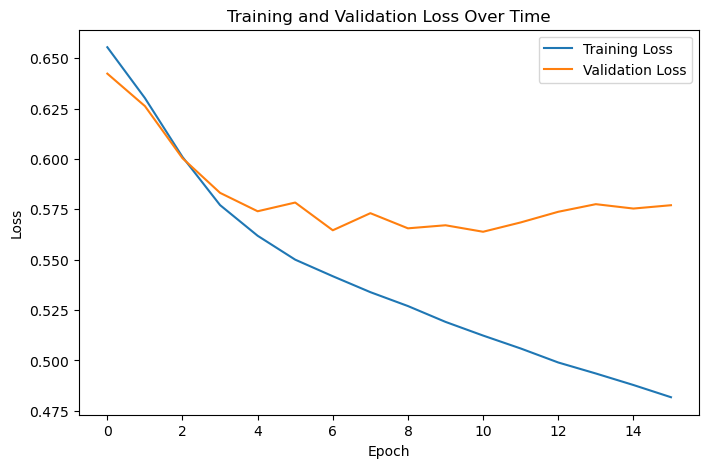

In [34]:
### Visualize
epochs_range = range(len(history.history['loss']))
plt.figure(figsize=(8,5))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Time")
plt.legend()
plt.show()

### Results

In [35]:
def evaluate_model(model, X_test, y_test):
    results = model.evaluate(X_test, y_test)
    print("    Test Loss: {:.4f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1]*100))
    print("     Test AUC: {:.4f}".format(results[2]))
    
    y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int))
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=['NOT APARTMENT', 'APARTMENT'])

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2) + 0.5, ['NOT APARTMENT', 'APARTMENT'])
    plt.yticks(np.arange(2) + 0.5, ['NOT APARTMENT', 'APARTMENT'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report: \n-----------------------------------------------\n", clr)

2178/2178 [==============================] - 5s 2ms/step - loss: 0.5676 - accuracy: 0.7055 - auc: 0.7744
    Test Loss: 0.5676
Test Accuracy: 70.55%
     Test AUC: 0.7744
2178/2178 [==============================] - 6s 2ms/step 


/tmp/ipykernel_1693/2170364710.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=np.int))


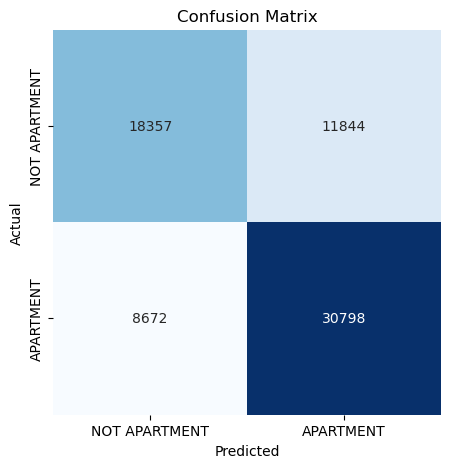

Classification Report: 
-----------------------------------------------
                precision    recall  f1-score   support

NOT APARTMENT       0.68      0.61      0.64     30201
    APARTMENT       0.72      0.78      0.75     39470

     accuracy                           0.71     69671
    macro avg       0.70      0.69      0.70     69671
 weighted avg       0.70      0.71      0.70     69671



In [36]:
evaluate_model(model, X_test, y_test)